## 一、資料預處理

In [1]:
import numpy
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

%matplotlib inline

""" Load Train and Test data """
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")
   

""" Preprocess Data """
cols = ['Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'] # 我們要的col位置
X_train = train_set[cols]   # 我們要的col位置
#Y_train = train_set['Survived']    
X_test = test_set[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] 
X_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
431,1,3,female,NaN,1,0,16.10,S
38,0,3,female,18.0,2,0,18.00,S
864,0,2,male,24.0,0,0,13.00,S
558,1,1,female,39.0,1,1,79.65,S
336,0,1,male,29.0,1,0,66.60,S


### 找出哪些欄位有遺失值

In [2]:
train_set.isnull().sum()    # 每個欄位遺失值的數量

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### 使用Describe來觀察train以及test的資料分布

In [4]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
data = train_set.append(test_set)
data.reset_index(inplace=True, drop=True)
data.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
293,24.0,NaN,S,8.8500,"Haas, Miss. Aloisia",0,294,3,female,0,0.0,349236
964,28.5,D43,C,27.7208,"Ovies y Rodriguez, Mr. Servando",0,965,1,male,0,NaN,PC 17562
1057,48.0,B10,C,50.4958,"Brandeis, Mr. Emil",0,1058,1,male,0,NaN,PC 17591
1090,NaN,NaN,S,8.1125,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",0,1091,3,female,0,NaN,65305
1150,21.0,NaN,S,7.7750,"Midtsjo, Mr. Karl Albert",0,1151,3,male,0,NaN,345501


## 二、資料分析

#### 生存以及死亡的比例是否有相當大的落差，發現大概死亡的比例是6成、生存的比例大概是4成

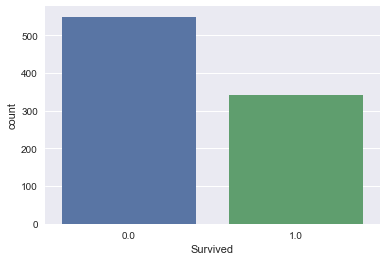

In [7]:
sns.countplot(data['Survived'])

#### 1艙等的生存率最高、再來是2艙等、最後是3艙等的

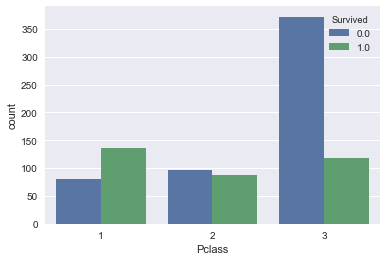

In [8]:
sns.countplot(data['Pclass'], hue=data['Survived'])

#### 女生生存率是男生的好幾倍。或許是像在電影裡頭一樣，在逃難的時候先讓女生以及小孩先搭船

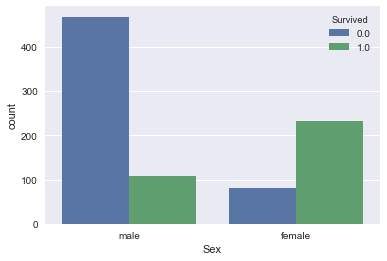

In [9]:
sns.countplot(data['Sex'], hue=data['Survived'])

#### S港出發的都比較容易死亡，其原因可能是S城市出發的人買的票價都比較便宜

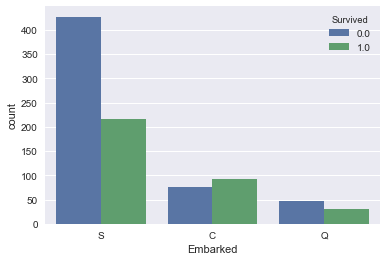

In [10]:
sns.countplot(data['Embarked'], hue=data['Survived'])

#### 年齡小的存活比例高出許多

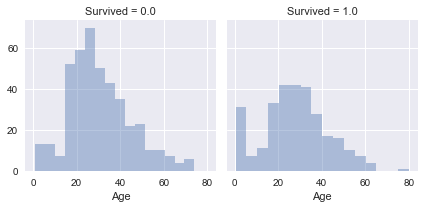

In [11]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#### 票價跟生存率的關係，可以發現票價低的乘客死亡率高出許多

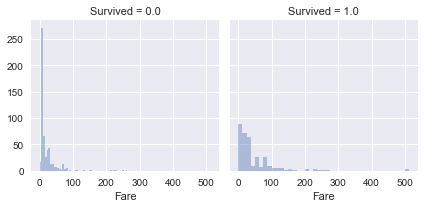

In [12]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

#### 父母＋小孩的數量跟生存率的關係，發現沒有跟父母小孩一起來的生存率比起有跟父母小孩來的低

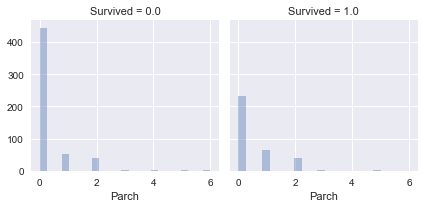

In [13]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

#### 兄弟姊妹＋丈夫妻子的數量跟生存率的關係，發現沒有帶兄弟姊妹＋丈夫妻子一起來的生存率比起有跟兄弟姊妹＋丈夫妻子來的低

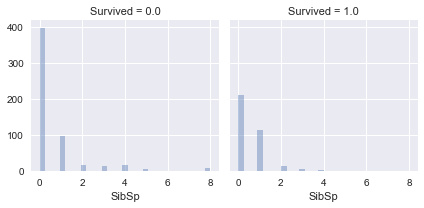

In [14]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

#### 把“父母＋小孩”加上“兄弟姊妹＋丈夫妻子”的數量變成一個新的欄位叫做家庭大小

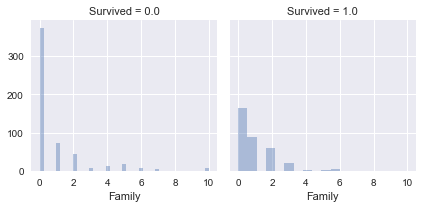

In [15]:
data['Family'] = data['Parch'] + data['SibSp']
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family', kde=False)

## 三、處理資料

In [16]:
def PreprocessData(data):
    for i in data:
        data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #提取名字
    
    data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
    
    # 年補年齡缺失值
    data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 32
    data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
    data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
    data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
    data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age'] = data['Age'].mean()
    
    # 把“父母＋小孩”加上“兄弟姊妹＋丈夫妻子”的數量變成一個新的欄位叫做家庭大小
    data['Family_size'] = data['SibSp'] + data['Parch']

    # 增加'Alone'特徵
    data['Alone'] = 0
    data.loc[data.Family_size==0,'Alone'] = 1
    
    # 將船費分級
    data['Fare_Range']=0
    data['Fare_Range']=pd.qcut(data['Fare'],4)
    data['Fare_cat']=0
    data.loc[data['Fare']<=7.91,'Fare_cat']=0
    data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
    data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
    data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3
    
    # 將'Sex','Embarked','Initial'轉為數值
    data['Sex'].replace(['male','female'],[0,1],inplace=True)
    data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
    data.loc[data.Embarked.isnull(),'Embarked']= data['Embarked'].mean()
    data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
    
    # 去除冗餘數據
    data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','Initial','SibSp','Parch','PassengerId'],axis=1,inplace=True)
    return data

In [17]:
train = PreprocessData(train_set)
X_test = PreprocessData(test_set.copy())

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


## 四、訓練資料

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pickle  # To save the model
import itertools

class ML_CLF:
    def __init__(self):
        self.X = ''
        self.y = ''

        self.svm = ''
        self.rf = ''       # random forest

        self.svm_pred = ''     
        self.rf_pred = ''

        self.svm_report = ''
        self.rf_report = ''

        self.svm_cm = ''       
        self.rf_cm = ''

        self.svm_score = ''
        self.rf_score = ''

    def Fit_value(self, x, y):
        self.X = x
        self.y = y

    def SVM(self,C=1,kernel='rbf'):
        self.svm = SVC(C=C,kernel=kernel, degree=3, probability=True)
        self.svm.fit(self.X, self.y)
    def SVM_predict(self,pred_x):
        self.svm_pred = self.svm.predict(pred_x)
        return  self.svm_pred

    
    def RF(self,n_estimators=200, criterion='gini', max_features='auto', oob_score=False):
        self.rf = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,
                                         max_features=max_features, oob_score=oob_score)
        self.rf.fit(self.X, self.y)
    def RF_prediction(self, pred_x):
        self.rf_pred = self.rf.predict(pred_x)
        return self.rf_pred

    
    def Train(self):
        self.SVM()
        self.RF()

    def Report(self, test_X, test_y, labels, show_cm=True):
        self.SVM_predict(test_X)   
        self.RF_prediction(test_X)

        self.svm_score = self.svm.score(test_X, test_y)      
        self.rf_score = self.rf.score(test_X, test_y)

        self.svm_report = metrics.classification_report(test_y, self.svm_pred)
        self.rf_report = metrics.classification_report(test_y, self.rf_pred)
       
        self.svm_cm = metrics.confusion_matrix(test_y, self.svm_pred,labels=labels)
        self.rf_cm = metrics.confusion_matrix(test_y, self.rf_pred, labels=labels)

        if show_cm:
            self.plot_confusion_matrix(self.svm_cm, classes=labels, title='SVM')
            self.plot_confusion_matrix(self.rf_cm, classes=labels, title='RF')


    def History(self):
        print('******************\nSVM : ',self.svm_report)
        print('******************\nRF : ', self.rf_report)

    def Score(self):
        print('SVM Score : ', self.svm_score)
        print('RF Score : ', self.rf_score)

    def Report2txt(self, filename):
        f = open(filename, 'w')
        f.write('SVM Score : '+ str(self.svm_score) + '\n')
        f.write('RF Score : '+ str(self.rf_score) + '\n')
        f.write('XXXX\n')
        f.write('******************\nSVM : '+ str(self.svm_report) + '\n')
        f.write('******************\nRF : '+ str(self.rf_report) + '\n')
        f.close()

        
    def Save_Model(self, model_name = "MyModel"):
        with open('save/'+model_name+'SVM'+'.pickle', 'wb') as f:
            pickle.dump(self.svm, f, protocol=2)
        with open('save/'+model_name+'RF'+'.pickle', 'wb') as f:
            pickle.dump(self.rf, f, protocol=2)
            
    def Read_Model(self, model_name = 'MyModel'):
        with open('save/'+model_name+'SVM'+'.pickle', 'rb') as f:
            self.svm = pickle.load(f)
        with open('save/'+model_name+'RF'+'.pickle', 'rb') as f:
            self.rf = pickle.load(f)       # random forest

            
    def plot_confusion_matrix(self,cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
        """
           This function prints and plots the confusion matrix.
           Normalization can be applied by setting `normalize=True`.
           """
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print(title, ' Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        # Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py



In [19]:
# 訓練和測試資料
Y_train = train['Survived'].values
X_train = train
X_train.drop('Survived', axis=1, inplace=True)

# 標準化
from sklearn.preprocessing import StandardScaler
stc = StandardScaler()
X_train = stc.fit_transform(X_train)
X_test = stc.fit_transform(X_test)

### 建立SVM和Random Forest模型

SVM  Confusion matrix, without normalization
[[517  32]
 [135 207]]


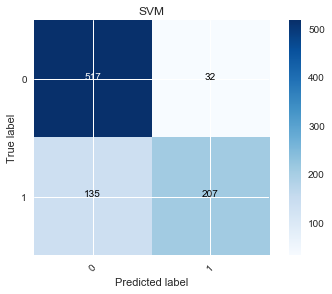

RF  Confusion matrix, without normalization
[[496  53]
 [ 88 254]]


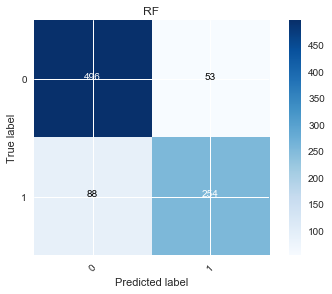

SVM Score :  0.812570145903
RF Score :  0.841750841751
******************
SVM :               precision    recall  f1-score   support

          0       0.79      0.94      0.86       549
          1       0.87      0.61      0.71       342

avg / total       0.82      0.81      0.80       891

******************
RF :               precision    recall  f1-score   support

          0       0.85      0.90      0.88       549
          1       0.83      0.74      0.78       342

avg / total       0.84      0.84      0.84       891



In [20]:
clf = ML_CLF()
clf.Fit_value(X_train, Y_train)
clf.Train()               # 訓練資料

clf.Report(X_train, Y_train, [0,1])
clf.Score()
clf.History()

## 五、預測結果

In [21]:
Y_test = clf.SVM_predict(X_test)
test_set['Survived'] = Y_test
test_set[["PassengerId","Survived"]].to_csv("submission_svm.csv",index=False)

In [22]:
Y_test = clf.RF_prediction(X_test)
test_set['Survived'] = Y_test
test_set[["PassengerId","Survived"]].to_csv("submission_rf.csv",index=False)